# ECE 498 DS Mini Project 2 - Template

# Fill NetIDs Here

gowtham4, somani4, mananm2

In [1]:
# libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap as sns_heatmap
from scipy.stats import ks_2samp as ks_test
from sklearn.decomposition import PCA
import sklearn.preprocessing
from sklearn.manifold import TSNE

from sklearn.cluster import k_means_ as Kmeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import AgglomerativeClustering as AggClustering

# Task 1: Data Cleaning and Visual Inspection

In [2]:
# Import all CSV data
bayes_inf_HE0 = pd.read_csv('BayesInferenceHE0.csv')
bayes_inf_HE1 = pd.read_csv('BayesInferenceHE1.csv')
quality = pd.read_csv('QualityControl.csv')
rel_abdnce_HE0 = pd.read_csv('RelativeAbundance_HE0.csv')
rel_abdnce_HE1 = pd.read_csv('RelativeAbundance_HE1.csv')

In [3]:
rel_abdnce_HE0

,Microbe Name,HE0Sample_0,HE0Sample_1,HE0Sample_2,HE0Sample_3,HE0Sample_4,HE0Sample_5,HE0Sample_6,HE0Sample_7,HE0Sample_8,...,HE0Sample_754,HE0Sample_755,HE0Sample_756,HE0Sample_757,HE0Sample_758,HE0Sample_759,HE0Sample_760,HE0Sample_761,HE0Sample_762,HE0Sample_763
0,Acidobacteria_Acidobacteria_Gp1_Telmatobacter_...,0.004239,0.004345,0.004423,0.004463,0.005372,0.004136,0.004457,0.004049,0.004638,...,0.004464,0.004636,0.004046,0.005518,0.005073,0.003527,0.005413,0.003140,0.002998,0.004829
1,Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3,0.013269,0.012312,0.011611,0.013033,0.013689,0.012752,0.009772,0.012148,0.013743,...,0.010603,0.013565,0.012139,0.012875,0.013294,0.014107,0.012694,0.013082,0.008244,0.010401
2,Actinobacteria_Actinobacteria_Acidimicrobiales...,0.003502,0.005251,0.006082,0.003749,0.004332,0.004136,0.004972,0.004930,0.004638,...,0.003906,0.002919,0.004782,0.006070,0.003498,0.004408,0.004853,0.004012,0.004310,0.005758
3,Actinobacteria_Actinobacteria_Actinomycetales_...,0.003870,0.005794,0.005345,0.004106,0.002946,0.003963,0.005315,0.003697,0.005326,...,0.005394,0.004979,0.004598,0.005518,0.005597,0.004761,0.004293,0.005233,0.004497,0.005386
4,Actinobacteria_Actinobacteria_Actinomycetales_...,0.004976,0.003802,0.004239,0.004285,0.005198,0.004136,0.003257,0.002993,0.003264,...,0.004092,0.003777,0.004782,0.004598,0.003848,0.004585,0.003360,0.004186,0.004684,0.002043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Tenericutes_Mollicutes_Anaeroplasmatales_Anaer...,0.004792,0.003983,0.004976,0.004285,0.003985,0.003963,0.003429,0.005458,0.005154,...,0.004464,0.005666,0.004782,0.005518,0.003848,0.005466,0.005973,0.004186,0.006933,0.005386
145,Tenericutes_Mollicutes_Haloplasmatales_Halopla...,0.004976,0.004345,0.004792,0.007499,0.004332,0.003274,0.004286,0.004930,0.003951,...,0.003720,0.004636,0.006805,0.003678,0.005947,0.004585,0.003547,0.004710,0.005059,0.005201
146,Tenericutes_Mollicutes_Mycoplasmatales_Mycopla...,0.013638,0.010139,0.011611,0.010891,0.009184,0.009478,0.013544,0.014261,0.012541,...,0.010417,0.013565,0.010116,0.011219,0.012944,0.011638,0.011200,0.010291,0.009743,0.014673
147,Thermodesulfobacteria_Thermodesulfobacteria_Th...,0.003870,0.003802,0.004423,0.003571,0.004159,0.004825,0.004972,0.003345,0.004810,...,0.005766,0.005151,0.003862,0.005334,0.004898,0.003879,0.004107,0.005058,0.003935,0.001857


## 0. Getting Started With the Data

### 1 They need to be sure that it is statistically significant. Hypothesis needs to be backed by data.

### 2 total number of samples = 764 + 764 = 1528

### 3 number of microbes = 149 

## 1. Bayesian Network for Quality Control

### a. Joint Probability Factorization

$$ P(Storage Temp, Collection Method, Contamination, Lab Time, Quality) $$
$$= P(Quality | Contamination, Lab Time) * P(Contamination | Storage Temp, Collection Method) * P(Storage Temp) * P(Collection Method) * P(Lab Time) $$

### b. Parameters Required

In [4]:
print('all are binary features')
print('total parameters reqd: ', (2**2) + (2**2) +(2-1)+(2-1)+(2-1))

all are binary features
total parameters reqd:  11


### c. Constructing Probability Tables

In [5]:
print(quality.head())
print('unique binary features')
[quality[i].unique() for i in quality.columns]

  strtmp   coll labtime  cont  qual
0   cold  nurse   short   low  good
1   cold  nurse   short   low  good
2   cold  nurse   short   low   bad
3   cold  nurse   short  high  good
4   cold  nurse   short   low  good
unique binary features


[array(['cold', 'cool'], dtype=object),
 array(['nurse', 'patient'], dtype=object),
 array(['short', 'long'], dtype=object),
 array(['low', 'high'], dtype=object),
 array(['good', 'bad'], dtype=object)]

In [6]:
# P(Storage Temp)

strtmp = {} 
strtmp['cold'] = sum(quality['strtmp'] == 'cold')/ len(quality)
strtmp['cool'] = 1 - strtmp['cold']
print('strtmp:', strtmp)

# P(Collection Method)

coll = {} 
coll['nurse'] = sum(quality['coll'] == 'nurse')/ len(quality)
coll['patient'] = 1 - coll['nurse']
print('coll', coll)

# P(Lab Time)
labtime = {}
labtime['short'] = sum(quality['labtime'] == 'short')/ len(quality)
labtime['long'] = 1 - labtime['short']
print('labtime', labtime,'\n\n')


## Note the following is a complicated line of operations chained on the dataframe, lots of things are happening! 

# P(Quality|Contamination, Lab Time)

qual_if_cont_labtime = quality.groupby(['cont','labtime','qual']).count().iloc[:,0].unstack(-1)
qual_if_cont_labtime = qual_if_cont_labtime.apply(lambda row: row/np.sum(row), axis = 1,result_type='expand')
print(qual_if_cont_labtime,'\n\n')

# P(Contamination|Storage Temp, Collection Method)

cont_if_strtmp_coll = quality.groupby(['strtmp','coll','cont']).count().iloc[:,0].unstack(-1)
cont_if_strtmp_coll = cont_if_strtmp_coll.apply(lambda row: row/np.sum(row), axis = 1,result_type='expand')
print(cont_if_strtmp_coll)



strtmp: {'cold': 0.8982, 'cool': 0.1018}
coll {'nurse': 0.8976, 'patient': 0.10240000000000005}
labtime {'short': 0.7956, 'long': 0.20440000000000003} 


qual               bad      good
cont labtime                    
high long     0.966102  0.033898
     short    0.064257  0.935743
low  long     0.080997  0.919003
     short    0.042907  0.957093 


cont                high       low
strtmp coll                       
cold   nurse    0.043983  0.956017
       patient  0.076577  0.923423
cool   nurse    0.088435  0.911565
       patient  0.838235  0.161765


### d. Final Probability Tables

In [7]:
# it turns out value_counts is simpler to use
cpt_quality = quality.groupby(['strtmp','coll','labtime'])['qual'].value_counts().unstack(-1)
cpt_quality = cpt_quality.apply(lambda row: row/np.sum(row), axis = 1,result_type='expand').fillna(value = 0)
print(cpt_quality)

#sanity check: print(cpt_quality.apply(np.sum, axis = 1))

qual                         bad      good
strtmp coll    labtime                    
cold   nurse   long     0.112038  0.887962
               short    0.044888  0.955112
       patient long     0.137931  0.862069
               short    0.056022  0.943978
cool   nurse   long     0.177215  0.822785
               short    0.027624  0.972376
       patient long     0.882353  0.117647
               short    0.039216  0.960784


### e. Cleaning the dataset

In [8]:
def remove_bad_samples (df):
    """to clean dataset and keep only good samples"""
    df_copy = df.copy()
    df_copy['quality'] = df.apply(is_row_good, axis = 1,raw=True)
    df_good = df[df_copy['quality'] == True]
    bad_samples = df[df_copy['quality'] == False].iloc[:,0]
    return df_good, bad_samples
         
    
def is_row_good(row):
    """ called from remove_bad_samples"""
#     print(tuple(row[1:]))
    return cpt_quality.loc[tuple(row[1:])][1] >= 0.5
    
    
bayes_HE0,HE0_bad = remove_bad_samples(bayes_inf_HE0) 
bayes_HE1,HE1_bad = remove_bad_samples(bayes_inf_HE1) 
print('Quality = Good Data\n\n')
print(bayes_HE0, bayes_HE1,'\n\n\n')
print('Quality = Bad Data\n\n')
print(HE0_bad,HE1_bad)

rel_abdnce_HE0 = rel_abdnce_HE0.drop(columns = HE0_bad.values )
rel_abdnce_HE1 = rel_abdnce_HE1.drop(columns = HE1_bad.values )


Quality = Good Data


        SampleName strtmp   coll labtime
0      HE0Sample_0   cold  nurse   short
1      HE0Sample_1   cold  nurse   short
2      HE0Sample_2   cold  nurse   short
3      HE0Sample_3   cold  nurse   short
4      HE0Sample_4   cold  nurse   short
..             ...    ...    ...     ...
694  HE0Sample_694   cold  nurse    long
695  HE0Sample_695   cold  nurse    long
696  HE0Sample_696   cold  nurse    long
697  HE0Sample_697   cold  nurse    long
698  HE0Sample_698   cold  nurse    long

[699 rows x 4 columns]         SampleName strtmp   coll labtime
0      HE1Sample_0   cold  nurse   short
1      HE1Sample_1   cold  nurse   short
2      HE1Sample_2   cold  nurse   short
3      HE1Sample_3   cold  nurse   short
4      HE1Sample_4   cold  nurse   short
..             ...    ...    ...     ...
694  HE1Sample_694   cold  nurse    long
695  HE1Sample_695   cold  nurse    long
696  HE1Sample_696   cold  nurse    long
697  HE1Sample_697   cold  nurse    long
698  HE1Sam

## 2. Data Standardization

### 1. Verify Relative Abundance

In [9]:
print("{0} HE0 Data points satisfy the relative abundance constraint."\
      .format(sum((1-1e-9 <= rel_abdnce_HE0.iloc[:,1:].apply(sum)) & \
                  (rel_abdnce_HE0.iloc[:,1:].apply(sum) <= 1+1e-9) )))


print("{0} HE1 Data points satisfy the relative abundance constraint."\
      .format(sum((1-1e-9 <= rel_abdnce_HE1.iloc[:,1:].apply(sum)) & \
                  (rel_abdnce_HE1.iloc[:,1:].apply(sum) <= 1+1e-9) )))

699 HE0 Data points satisfy the relative abundance constraint.
699 HE1 Data points satisfy the relative abundance constraint.


### 2. Discussion on Relative Abundance Data

This gives us a constrained snapshot of the relative distributions of microbes in a specific sample. There is a problem in doing this, i.e. we lose the inter sample variation information. For example one sample may have abnormally high number of microbes overall which will skew the distribution.

### 3. Visual Inspection

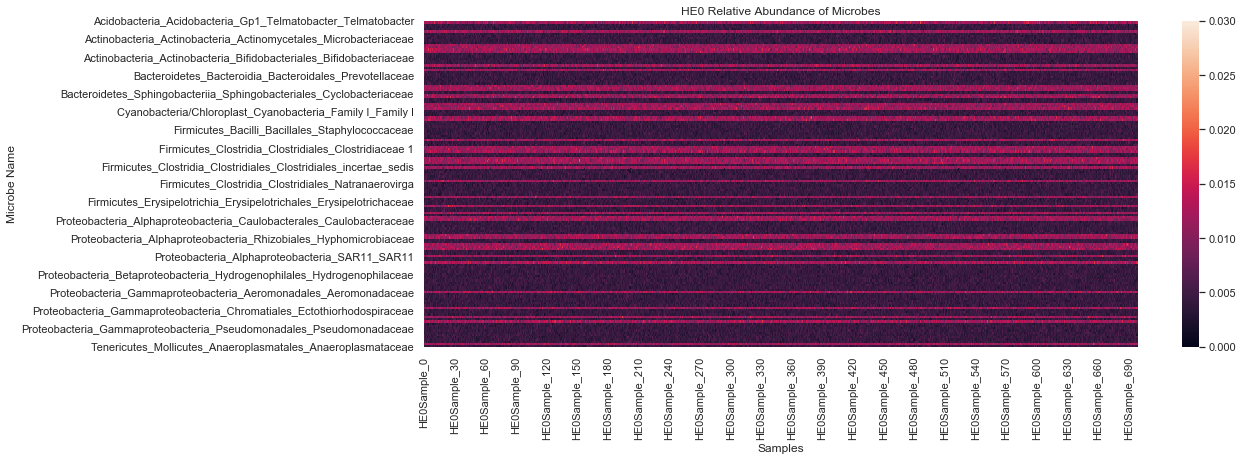

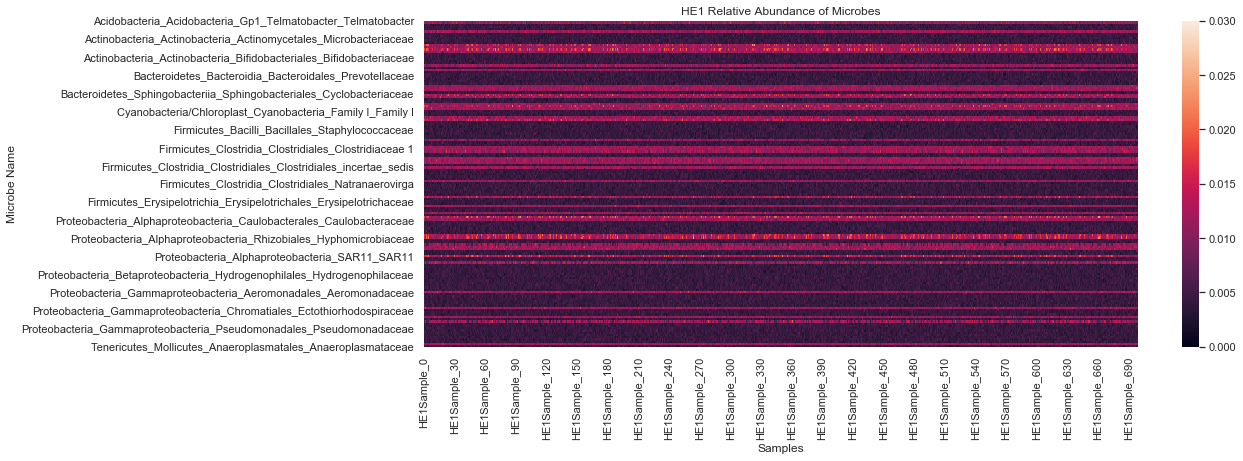

In [10]:
sns.set()
sns_heatmap(rel_abdnce_HE0.set_index('Microbe Name'), vmin=0, vmax=0.03)
plt.xlabel('Samples')
plt.title('HE0 Relative Abundance of Microbes')
fig = plt.gcf()
fig.set_size_inches(16,6)
plt.show()

#plt.savefig('HE0_rel_abundance.png', bbox_inches='tight')
sns_heatmap(rel_abdnce_HE1.set_index('Microbe Name'), vmin=0, vmax=0.03)
plt.xlabel('Samples')
plt.title('HE1 Relative Abundance of Microbes')
fig = plt.gcf()
fig.set_size_inches(16,6)
plt.show()

#plt.savefig('HE1_rel_abundance.png', bbox_inches='tight')

Concentrations of microbes across the samples is apparent

# Task 2: Statistical Analysis

## 1. Kolmogorov-Smirnov (KS) Test

### a. p-value for Two-Sample KS Test

In [11]:
def ks_test_p_value(alpha_level):
    altered = 0
    p_values = []
    for i in range(len(rel_abdnce_HE0)):
        KS_val,p = ks_test(rel_abdnce_HE0.iloc[i,1:],rel_abdnce_HE1.iloc[i,1:])
        p_values.append(p)
        if p < alpha_level:
            #print(rel_abdnce_HE0.iloc[i,0], ', Reject H0: ', 'They are altered in HE0 vs HE1')
            altered+=1       
        else:
            #print('not altered')           
            pass
    return altered,p_values

### b. Null Hypothesis of the KS Test in our Context

Null hypothesis is that both samples are drawn from same continuous distribution.

### c. Number of Genes with Significantly Altered Expression at Various Alpha Values

In [12]:
altered_ks_test = []
for a in [0.1, 0.05, 0.01, 0.005, 0.001]:
    altered, p_values= ks_test_p_value(a)
    altered_ks_test.append([a, altered])
#     plt.hist(p_values)
#     plt.axhline(y = a)
#     plt.xlabel('p-value')
#     plt.title('table for alpha')
#     plt.show()
print(altered_ks_test)

[[0.1, 50], [0.05, 37], [0.01, 27], [0.005, 26], [0.001, 21]]


## 2. Multiple Testing

### a. P-value

Critical values for distances are obtained from a D-statistic table. The D-statistic is the absolute max distance between the CDFs of the two samples. 

Calculation of P-value is done assuming H0 is true. P-value of 0.05 represents 5% probability of rejecting H0 falsely. In our context,  H0: for a microbe both HE0 and HE1 sample follow same distribution

### b. P-value Distribution

Uniform distribution. The distribution of an invertible CDF of a random variable is uniform on [0,1]
https://stats.stackexchange.com/questions/10613/why-are-p-values-uniformly-distributed-under-the-null-hypothesis

### c. Expected Number of Significant p-values

compared in other ipynb

### d. Q-Q plot of p-values

#### i. 

In [13]:
expected_p_val = list(np.random.uniform(0,1,len(rel_abdnce_HE0)))
observed_p_val = p_values

#### ii. 

In [14]:
expected_log = -np.log10(expected_p_val)
observed_log = -np.log10(observed_p_val)

#### iii. 

In [15]:
expected_log.sort()
observed_log.sort()

#### iv,v,vi. 

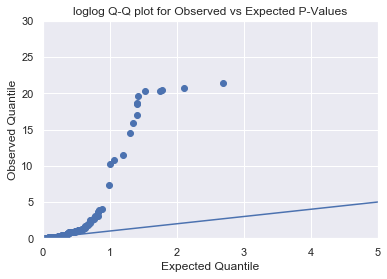

In [16]:
# combined plot
plt.scatter(expected_log,observed_log)
plt.plot(range(len(expected_log)),range(len(expected_log)))
plt.xlabel('Expected Quantile')
plt.ylabel('Observed Quantile')
plt.title('loglog Q-Q plot for Observed vs Expected P-Values')
plt.xlim([0,5])
plt.ylim([0,30])
plt.show()

### e. Follow-up Questions

#### i. 

Function -log10 blows up the p-values closer to 0. For example -log(0.001) = 3 and -log(0.01) = 2. Data above 0.1 is less emphasized. This helps us focus more on the lowe numerical values of p_value which are critical when making decision on elimination of H0

#### ii. 

Q-Q doesn't align with the x=y line hence the distributions are quite different, we can say expected and observed p-values follow different distributions. Assumption **H0 = True is probably false**. There is a difference between HE0 and HE1 samples and this difference is explained

# Task 3: Dimensionality Reduction and Clustering

## 1. PCA

### a. Performing PCA

In [17]:
"""  Always center the data before PCA!
standard scalar step is not necesary as it is auto centered by PCA SVD algorithm
# X_HE0 = sklearn.preprocessing.StandardScaler(with_std = False).fit_transform(X_HE0)
"""
def HE_pca(rel_abd_data,he):
    X_HE = rel_abd_data.iloc[:,1:].values.transpose() #PCA takes in data with shape = (n_samples, n_features)
    pca_HE = PCA(svd_solver='full').fit(X_HE)
    transformed_pca_HE = PCA(svd_solver='full').fit_transform(X_HE)
    return pca_HE, transformed_pca_HE

pca_HE0, transformed_pca_HE0 = HE_pca(rel_abdnce_HE0,'HE0')
pca_HE1, transformed_pca_HE1 = HE_pca(rel_abdnce_HE1,'HE1')


def print_pca_data(pca_HE, transformed_pca_HE,he):
    
    print('PCA components of '+ he +' data')
    print(pca_HE.components_)
    print('shape = ',pca_HE.components_.shape)

    print('\n')
    
    print('Transformed HE0 data along top 2 PCs')
    print(transformed_pca_HE)
    print(transformed_pca_HE.shape)

print_pca_data(pca_HE0, transformed_pca_HE0, 'HE0')
print('\n\n\n')
print_pca_data(pca_HE1, transformed_pca_HE1, 'HE1')

PCA components of HE0 data
[[ 0.02708583 -0.27209519  0.02921411 ...  0.01241346  0.03428822
   0.04823499]
 [ 0.02368855 -0.11275225 -0.04408756 ...  0.26686045  0.00534046
  -0.00557399]
 [ 0.0300866  -0.03192389  0.02924745 ... -0.20209567  0.01221385
   0.01080152]
 ...
 [ 0.00739074 -0.00205493 -0.23256405 ... -0.01644143  0.05045924
  -0.00840309]
 [-0.005061    0.01749053  0.00286574 ...  0.0010903   0.13420949
   0.03049928]
 [-0.08192319 -0.08192319 -0.08192319 ... -0.08192319 -0.08192319
  -0.08192319]]
shape =  (149, 149)


Transformed HE0 data along top 2 PCs
[[ 3.16825181e-03  3.55706307e-03 -1.65620588e-03 ...  2.69986376e-04
  -4.77951585e-04  1.92420915e-17]
 [ 5.37173558e-03 -8.68098945e-04  2.95214235e-03 ... -7.10971671e-04
  -3.61401135e-04  1.67223136e-17]
 [ 4.64589343e-03  1.75348818e-03  2.13775032e-03 ... -1.86873925e-04
  -7.32159867e-04  1.52980097e-17]
 ...
 [-9.89114121e-04 -1.87644483e-03 -7.06923633e-04 ... -8.53000412e-04
  -1.46822269e-04  1.60196671e-1


### b. Ordering Components

~ 15 Features are required for explaining 30% of the variance
~ 2 Features are required for explaining 30% of the variance


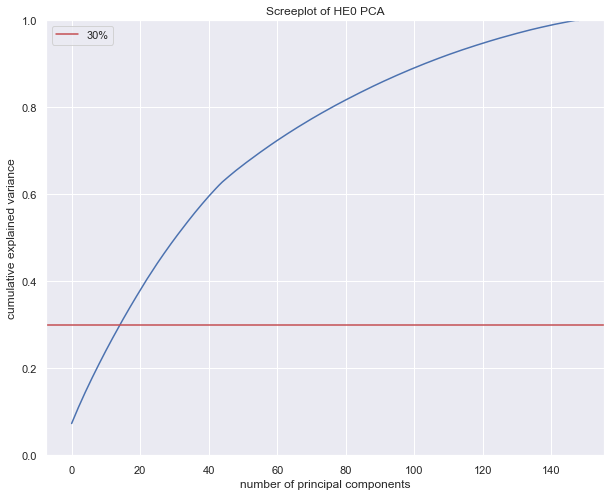

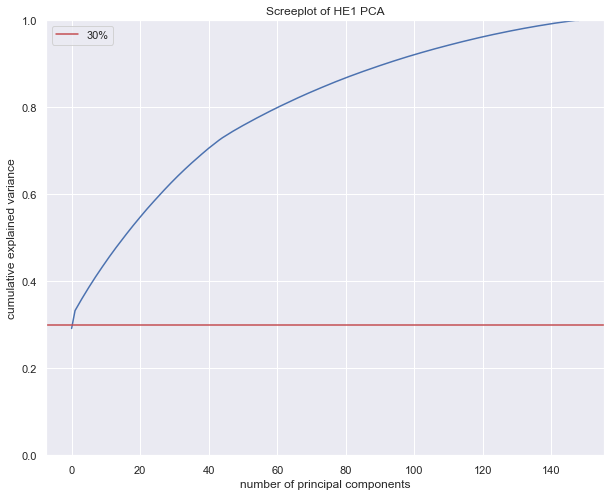

In [18]:
#print(pca_HE0.explained_variance_ratio_)
plt.figure(figsize = (10,8))
plt.plot(np.cumsum(pca_HE0.explained_variance_ratio_))
plt.axhline(0.3,color = 'r',label = '30%')
plt.xlabel('number of principal components')
plt.ylabel('cumulative explained variance')
plt.title('Screeplot of HE0 PCA')
plt.ylim([0.0,1.0])
plt.legend()
print('~ 15 Features are required for explaining 30% of the variance')


#print(pca_HE1.explained_variance_ratio_)
plt.figure(figsize = (10,8))
plt.plot(np.cumsum(pca_HE1.explained_variance_ratio_))
plt.axhline(0.3,color = 'r',label = '30%')
plt.xlabel('number of principal components')
plt.ylabel('cumulative explained variance')
plt.title('Screeplot of HE1 PCA')
plt.ylim([0.0,1.0])
plt.legend()
print('~ 2 Features are required for explaining 30% of the variance')



### c. Scatter Plot of Microbe Abundance

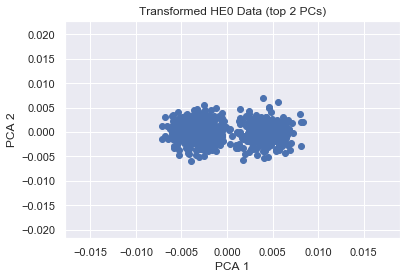

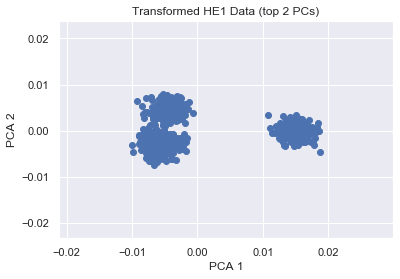

We see that tiny clustering is happening. It looks like there are 2 clusters in HE0 and 3 clusters in HE1.though it doesn't fully explain the variance in the data


In [19]:
X_HE0 = rel_abdnce_HE0.iloc[:,1:].values.transpose()
transformed_pca_HE0 = PCA(svd_solver='full',n_components=2).fit_transform(X_HE0)
plt.scatter(transformed_pca_HE0[:,0],transformed_pca_HE0[:,1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Transformed HE0 Data (top 2 PCs)')
plt.show()

X_HE1 = rel_abdnce_HE1.iloc[:,1:].values.transpose()
transformed_pca_HE1 = PCA(svd_solver='full',n_components=2).fit_transform(X_HE1)
plt.scatter(transformed_pca_HE1[:,0],transformed_pca_HE1[:,1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Transformed HE1 Data (top 2 PCs)')
plt.show()

print("We see that tiny clustering is happening. It looks like there are 2 clusters in HE0 and 3 clusters in HE1.\
though it doesn't fully explain the variance in the data")

## 2. t-SNE

### a. Performing t-SNE

(699, 2)
[[ 7.2830024   4.449844  ]
 [ 3.6419764   9.444181  ]
 [-2.4427757  12.601306  ]
 ...
 [ 0.6946118  -4.9426703 ]
 [-1.1521691   1.6630347 ]
 [ 0.67386895 -4.150024  ]]


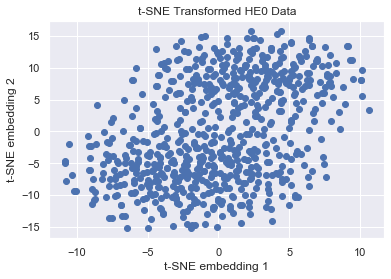

(699, 2)
[[  6.3867044    0.8379015 ]
 [-34.960182     1.4196156 ]
 [ 12.720333     0.19077617]
 ...
 [  7.926655    -9.706523  ]
 [  1.2883544   -8.993513  ]
 [ 12.168205    -4.760617  ]]


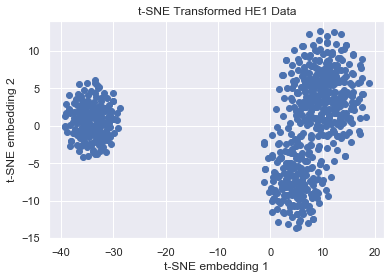

We see the formation of clusters. It is more distinct in the case of HE1 compared to HE0. Also the plots aren't      unique. They change every time we run the code due to different initialization. And it is very slow


In [20]:
def tsne_HE(rel_abd_data,n_comp,he):
    
    X_HE = rel_abd_data.iloc[:,1:].values.transpose()
    tsne_HE = TSNE(n_components=2,random_state = 42).fit_transform(X_HE)
    print(tsne_HE.shape)
    print(tsne_HE)

    plt.scatter(tsne_HE[:,0],tsne_HE[:,1],cmap = 'plasma')
    plt.xlabel('t-SNE embedding 1')
    plt.ylabel('t-SNE embedding 2')
    plt.title('t-SNE Transformed ' + he +' Data')
    plt.show()
    return tsne_HE

tsne_he0 = tsne_HE(rel_abdnce_HE0,2,'HE0')
tsne_he1 = tsne_HE(rel_abdnce_HE1,2,'HE1')




print('We see the formation of clusters. It is more distinct in the case of HE1 compared to HE0. Also the plots aren\'t\
      unique. They change every time we run the code due to different initialization. And it is very slow')
      

### b. Comparing with PCA

It is somewhat similar to PCA. But the distinction between clusters is more visible in the case of t-SNE. but it suffers from non-standard (random) initialization issues, slowness. The SciPy website suggests using PCA for features >50 which is true in this case.
**Hence we are probably better off using PCA in this situation.**

## 3. Clustering

### a. K-Means

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)


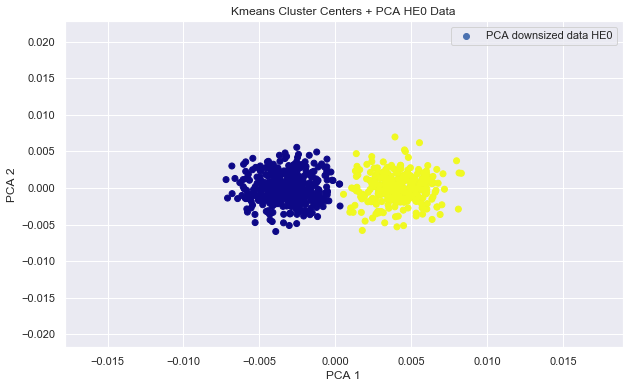

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)


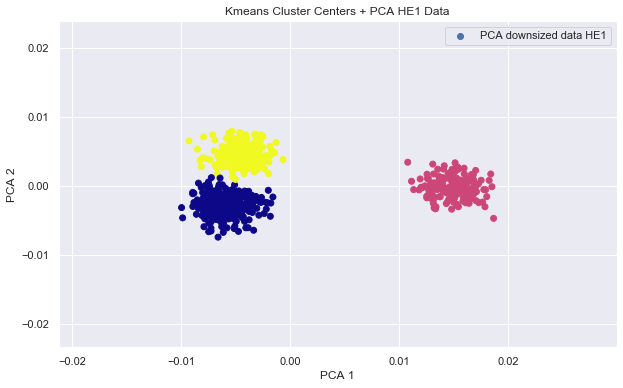

(KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=42, tol=0.0001, verbose=0),
 array([0, 1, 0, 1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1, 2, 2, 2,
        0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 1, 1,
        1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 1, 0,
        0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 2, 1, 0, 2, 2, 1,
        2, 2, 2, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 2, 1, 2, 1, 2, 1, 0, 0, 0,
        2, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
        2, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 0,
        0, 1, 1, 0, 2, 0, 2, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0,
        1, 2, 2, 0, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 2, 0, 0, 0, 0,
        2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 1, 0, 0, 2, 0,
        2, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0, 1, 0, 1, 

In [21]:
def HE_k_means(trans_data,n_clus,he,to_plot):
    kmeans_HE = Kmeans.KMeans(n_clusters = n_clus,random_state = 42)
    kmeans_HE.fit(trans_data)
    print(kmeans_HE)
    y_kmeans_HE = kmeans_HE.fit_predict(trans_data)

    #plotting
    if to_plot:
        plt.scatter(trans_data[:,0],trans_data[:,1],c=y_kmeans_HE,label = 'PCA downsized data '+he,cmap = 'plasma')
        plt.xlabel('PCA 1')
        plt.ylabel('PCA 2')
        plt.title('Kmeans Cluster Centers + PCA ' + he + ' Data')
        plt.legend()
        fig = plt.gcf()
        fig.set_size_inches(10,6)
        plt.show()
    return kmeans_HE,y_kmeans_HE

HE_k_means(transformed_pca_HE0,2,'HE0',True)
HE_k_means(transformed_pca_HE1,3,'HE1',True)

### b. GMM

In [22]:
"""Plotting GMMS nicely
https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html#sphx-glr-auto-examples-mixture-plot-gmm-py
"""
import itertools
from scipy import linalg
import matplotlib as mpl
color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 1, color=color,label = 'Transformed Data Cluster '+ str(i))

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
        #print(Y_)

#     plt.xlim(-9., 5.)
#     plt.ylim(-3., 6.)
    plt.xlabel ('PCA1')
    plt.ylabel ('PCA2')
    fig = mpl.pyplot.gcf()
    fig.set_size_inches(12,12)
    plt.legend()
    plt.title(title)
    


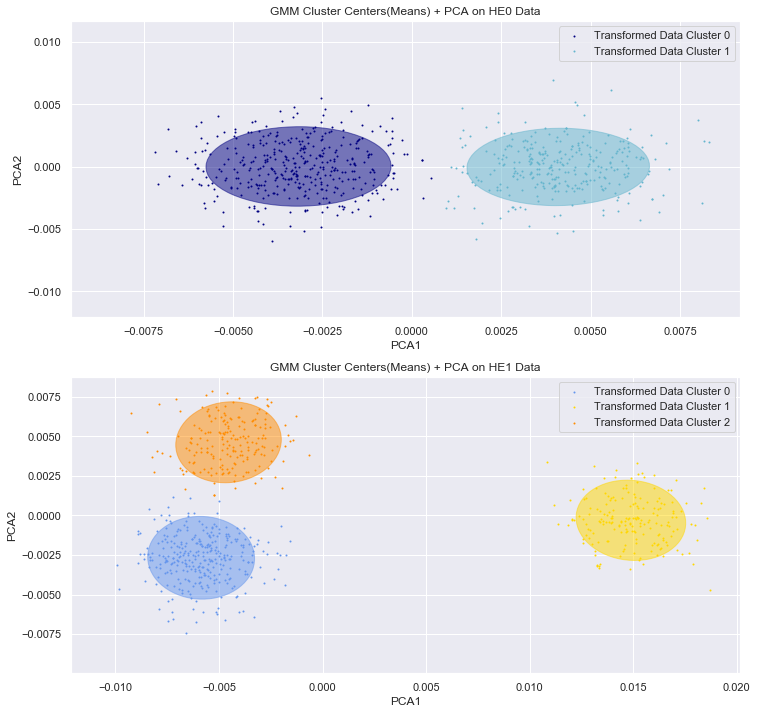

In [23]:
def HE_gmm(trans_data,n_clus,he,index):
    gmm_HE = GMM(n_components=n_clus)
    gmm_HE.fit(trans_data)
    plot_results(trans_data, gmm_HE.predict(trans_data), gmm_HE.means_, gmm_HE.covariances_, index,
                 'GMM Cluster Centers(Means) + PCA on '+ he + ' Data')


HE_gmm(transformed_pca_HE0,2,'HE0',0)
print('\n\n')
HE_gmm(transformed_pca_HE1,3,'HE1',1)

### c. Single and Complete Linkage Hierarchical

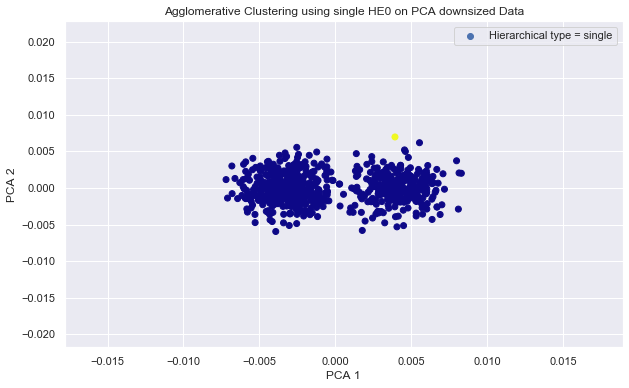

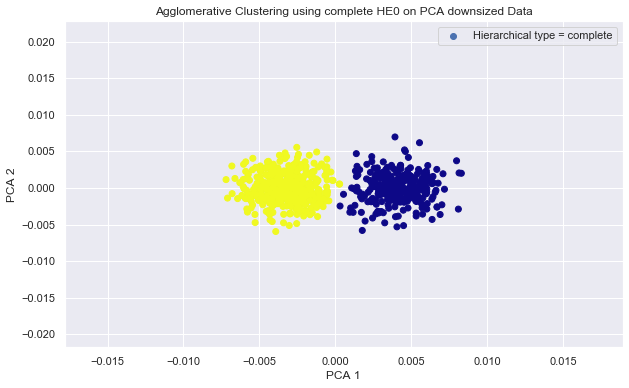

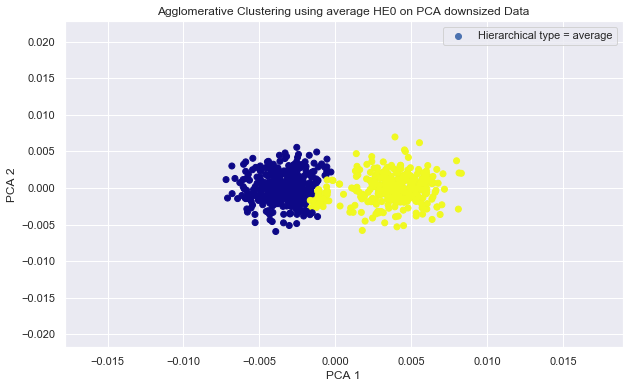

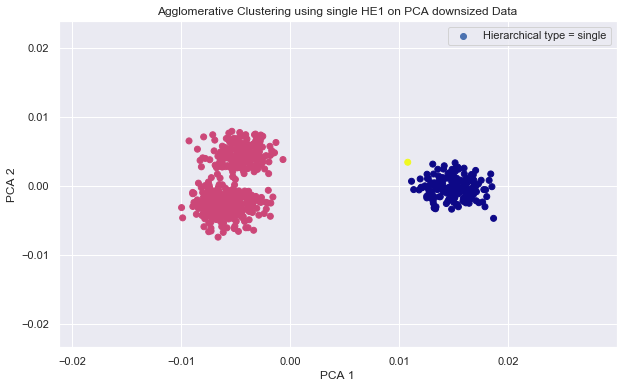

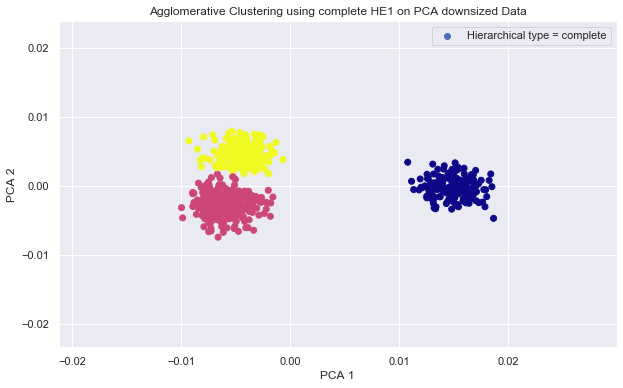

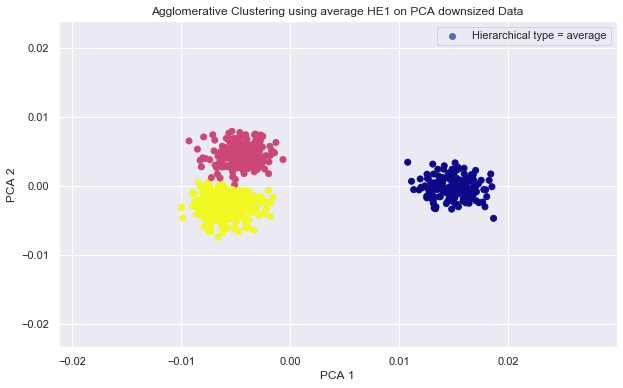

In [24]:
# Agglomerative clustering
sns.set_color_codes("deep")
def HE_hier_clus(trans_data,n_clus,link_type,he):
    hier_clus = AggClustering(n_clusters=n_clus,linkage=link_type).fit_predict(trans_data)
    
    #plotting
    plt.scatter(trans_data[:,0],trans_data[:,1], c = hier_clus,label = 'Hierarchical type = '+ link_type,cmap = 'plasma')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title('Agglomerative Clustering using '+ link_type + ' ' + he + ' on PCA downsized Data')
    plt.legend()
    fig = plt.gcf()
    fig.set_size_inches(10,6)
    plt.show()

HE_hier_clus(transformed_pca_HE0,2,'single','HE0')
HE_hier_clus(transformed_pca_HE0,2,'complete','HE0')
HE_hier_clus(transformed_pca_HE0,2,'average','HE0')



HE_hier_clus(transformed_pca_HE1,3,'single','HE1')
HE_hier_clus(transformed_pca_HE1,3,'complete','HE1')
HE_hier_clus(transformed_pca_HE1,3,'average','HE1')
   



### d. Single vs Complete Link Hierarchical Clustering

In [25]:
print('1. only one point in in bright crema colour color cluster in singlly linked HE0 data')
print('\n')
print('2. We see that complete linkage works best for HE0 data but single linkage failed utterly due to it\'s \
implementation. It is well known that these algorithms are greedy and are not guaranteed to converge to the global optima.')    
print('\n')
print('3. Compared to single link, complete link and average link performed similarly in HE1 data.')

1. only one point in in bright crema colour color cluster in singlly linked HE0 data


2. We see that complete linkage works best for HE0 data but single linkage failed utterly due to it's implementation. It is well known that these algorithms are greedy and are not guaranteed to converge to the global optima.


3. Compared to single link, complete link and average link performed similarly in HE1 data.


### e. Comparing Clustering Techniques

In [26]:
print("Overall K-means and GMM performed better than Hierarchical clustering which is riddled with issues.")
print('\n')
print("If we had to choose one, then K-means is much easier to compute.")
      
      

Overall K-means and GMM performed better than Hierarchical clustering which is riddled with issues.


If we had to choose one, then K-means is much easier to compute.


### f. What do Clusters Represent

In [27]:
print("In the current context, the clusters represent closeness based on a linear combination \
of relative abundance of microbiome")
print('\n')
print('We can call these subpopulations of the respective HE dataset')
print('\n')
print("Different PCAs cover certain linear combination of microbiome along which the variance of the data is maximum")




In the current context, the clusters represent closeness based on a linear combination of relative abundance of microbiome


We can call these subpopulations of the respective HE dataset


Different PCAs cover certain linear combination of microbiome along which the variance of the data is maximum


### g. Deciding on Number of Clusters

In [28]:
print('Most of the current clustering happened to aid visual interpretation of the data.')
print('\nWe only chose PCAs which cover 30% of the overall variance. In the case of HE1 data, most of the variance \
seems to be explained well. But in n-dimensions (n>2) we may potentially see different clustering action.')




Most of the current clustering happened to aid visual interpretation of the data.

We only chose PCAs which cover 30% of the overall variance. In the case of HE1 data, most of the variance seems to be explained well. But in n-dimensions (n>2) we may potentially see different clustering action.


# Task 4: Interpreting Results

## 1. Identify Microbes with Altered Abundance Levels

### a. Determine if each HE1 Subpopulation shows altered abundance levels

Analysis procedure:

 Initially we would like to see the various clusters that we plotted before and identify the PCAs which helped plot the figures.
 Then we will compare the makeup of clusters centers (in PCA vectors coordinates). To compare the difference we need to convert them back to same coordinates (dim = 149x1)
This transformation occurs via addition of mean of original data (dim = 149x1)
Plot all the cluster centers on the same plot and observe the relations between different line scatter plots(colored)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)


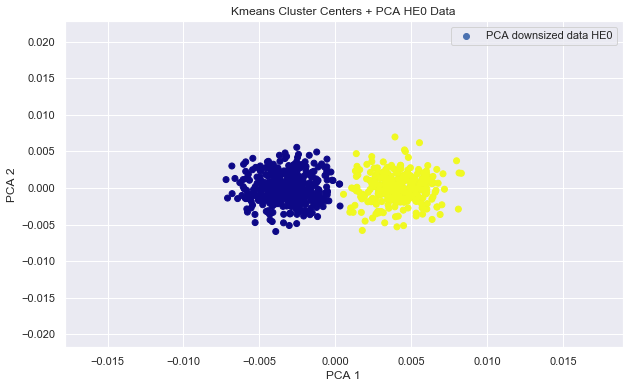

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)


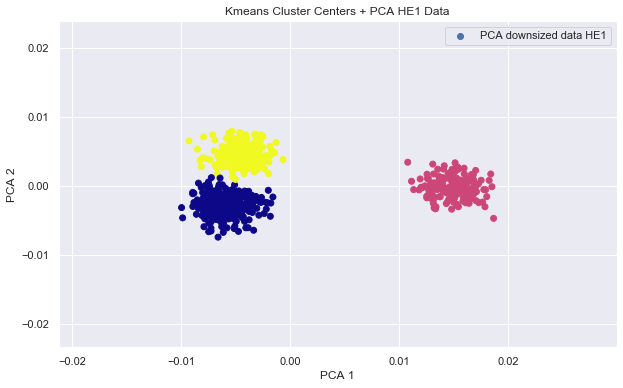

[[-3.19724545e-03  2.14783580e-05]
 [ 4.10626622e-03 -2.75849500e-05]]
[[-0.00587303 -0.00271075]
 [ 0.01488905 -0.00030692]
 [-0.00453836  0.00461302]]


In [29]:
print('Analysis procedure:\n')
print(' Initially we would like to see the various clusters that we plotted before and \
identify the PCAs which helped plot the figures.')
print(' Then we will compare the makeup of clusters centers (in PCA vectors coordinates). \
To compare the difference we need to convert them back to same coordinates (dim = 149x1)')
print('This transformation occurs via addition of mean of original data (dim = 149x1)')
print('Plot all the cluster centers on the same plot and observe the relations between different line scatter plots(colored)')

# revisiting kmeans and PCA
he0_kmeans,y_kmeans_HE0 = HE_k_means(transformed_pca_HE0,2,'HE0',True)
he1_kmeans,y_kmeans_HE1 = HE_k_means(transformed_pca_HE1,3,'HE1',True)

he0_clusts = he0_kmeans.cluster_centers_ # change the coordinate axes from HE PCAs to original microbes
he1_clusts = he1_kmeans.cluster_centers_ # change the coordinate axes

print(he0_clusts)
print(he1_clusts)


2
3


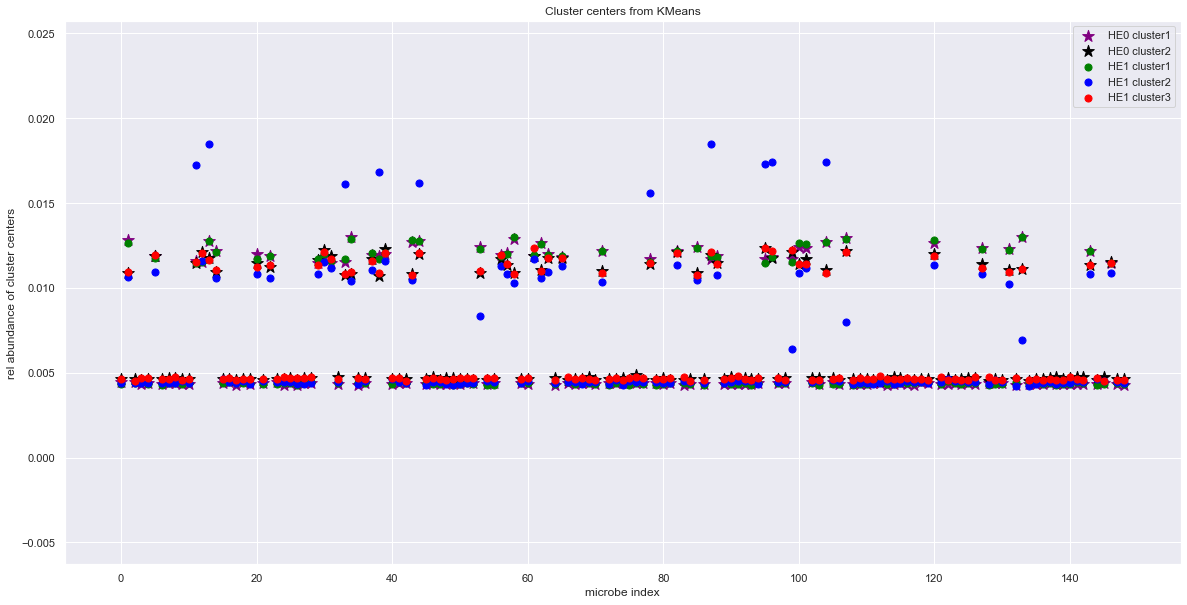

black -> red
purple -> green
blue


In [30]:
he0_center = rel_abdnce_HE0.iloc[:,1:].apply(np.mean,axis = 1)
he1_center = rel_abdnce_HE1.iloc[:,1:].apply(np.mean,axis = 1)


new_points0 = [he0_center + clus[0]*pca_HE0.components_[0] + clus[1]*pca_HE0.components_[1] for clus in he0_clusts]
new_points1 = [he1_center + clus[0]*pca_HE1.components_[0] + clus[1]*pca_HE1.components_[1] for clus in he1_clusts]
print(len(new_points0))
print(len(new_points1))

# sns.stripplot(new_points0[0])
clrs0 = ['purple','black']
clrs1 = ['green','blue','red']
plt.figure(figsize = (20,10) )
j = 0
for i in new_points0:
    #if j==1:
    plt.scatter(range(149),i, color = clrs0[j],marker = '*',s = 150,label = 'HE0 cluster' + str(j+1))
    j+=1
    
j = 0    
for i in new_points1:
    #if j in [1,2]:
    plt.scatter(range(149),i, color = clrs1[j],s= 50,label = 'HE1 cluster' + str(j+1))
    j+=1
    
plt.xlabel('microbe index')
plt.ylabel('rel abundance of cluster centers')
plt.title('Cluster centers from KMeans')
plt.legend(loc = 'best')
plt.show()

print('black -> red')
print('purple -> green')
print('blue')

### b. Identify Most Similar HE0 Clusters to Affected HE1 Clusters

In [31]:
print('In this section, we extend our analysis from previous part. We calculate euclidean distances b/w different cluster centers\
and then make a decision based on  the numerical results.')

#Euclidean distance 
print('Euclidean distance b/w HE1 cluster centers and HE0 clusters\n')
for j in range(3):
    print('cluster number in HE1', j)
    print('HE1 cluster center = \n', new_points1[j])
    print('\n')
    
    for i,he0_p in enumerate(new_points0):
        dist = np.linalg.norm(new_points1[j]-he0_p)
        print('dist with HE0 cluster center '+str(i),' = ', dist)
        print('\n')
        


print('Cluster Relations:\nfor colors refer to picture ')
print('black -> red  - close match', )
print('purple -> green  - close match')
print('blue - significantly different')

In this section, we extend our analysis from previous part. We calculate euclidean distances b/w different cluster centersand then make a decision based on  the numerical results.
Euclidean distance b/w HE1 cluster centers and HE0 clusters

cluster number in HE1 0
HE1 cluster center = 
 0      0.004337
1      0.012646
2      0.004398
3      0.004448
4      0.004345
         ...   
144    0.004290
145    0.004314
146    0.011490
147    0.004414
148    0.004339
Length: 149, dtype: float64


dist with HE0 cluster center 0  =  0.0010711276715662749


dist with HE0 cluster center 1  =  0.007276161979768443


cluster number in HE1 1
HE1 cluster center = 
 0      0.004414
1      0.010620
2      0.004374
3      0.004393
4      0.004378
         ...   
144    0.004606
145    0.004504
146    0.010879
147    0.004432
148    0.004403
Length: 149, dtype: float64


dist with HE0 cluster center 0  =  0.02091671973515307


dist with HE0 cluster center 1  =  0.02024359479798244


cluster number in HE1 

### c. Identify Microbes with Significantly Altered Relative Abundance

In [32]:
alpha_level = 0.0000025
altered = 0

#print('cluster assignemnts in HE0', y_kmeans_HE0)
purple = rel_abdnce_HE0.iloc[:,1:].T.reset_index().iloc[:,1:][pd.Series(y_kmeans_HE0) ==0]
black = rel_abdnce_HE0.iloc[:,1:].T.reset_index().iloc[:,1:][pd.Series(y_kmeans_HE0) ==1]


#print('cluster assignemnts in HE1', y_kmeans_HE1)
green = rel_abdnce_HE1.iloc[:,1:].T.reset_index().iloc[:,1:][pd.Series(y_kmeans_HE1) ==0]
red = rel_abdnce_HE1.iloc[:,1:].T.reset_index().iloc[:,1:][pd.Series(y_kmeans_HE1) ==2]


print('purple -> green')
for i in range(len(rel_abdnce_HE0)): #149
    
    KS_val,p = ks_test(purple[i],green[i]) # ith microbe
    p_values.append(p)
    
    if p < alpha_level:
        altered+=1
        print(rel_abdnce_HE0.iloc[i,0])
print(altered)        

print('\n\n\n')        
print('black -> red ')
altered = 0
for i in range(len(rel_abdnce_HE0)): #149
    
    KS_val,p = ks_test(black[i],red[i])
    p_values.append(p)
    
    if p < alpha_level:
        altered+=1
        print(rel_abdnce_HE0.iloc[i,0])
print(altered) 



purple -> green
0




black -> red 
0


In [33]:
print(y_kmeans_HE0)
print(y_kmeans_HE1)

[1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0
 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1
 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0
 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0
 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0
 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0
 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0
 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1
 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1
 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 1 1 0 1 1 1 0 0 0 

## 2. Identify How Abundance Changes

### a. Microbes which increase and decrease

In [34]:
mean_microbe_HE0 = rel_abdnce_HE0.iloc[:,1:].apply(np.mean,axis = 1)
mean_microbe_HE1 = rel_abdnce_HE1.iloc[:,1:].apply(np.mean,axis = 1)
print('Mean Microbe Abundances:')
# print(mean_microbe_HE0,mean_microbe_HE1)

for i in range(len(mean_microbe_HE0)) :
    a = mean_microbe_HE0[i]
    b = mean_microbe_HE1[i]
    if b - a > 0.0005:
        print('Microbe {0}: {1}'.format(i,rel_abdnce_HE0.iloc[i,0]),' has  higher microbe concentration')
    if a - b >= 0.0005:
        print('Microbe {0}: {1}'.format(i,rel_abdnce_HE0.iloc[i,0]),' has  lower microbe concentration')
    
    

Mean Microbe Abundances:
Microbe 11: Actinobacteria_Actinobacteria_Actinomycetales_Nakamurellaceae  has  higher microbe concentration
Microbe 13: Actinobacteria_Actinobacteria_Actinomycetales_Propionibacteriaceae  has  higher microbe concentration
Microbe 33: Bacteroidetes_Sphingobacteriia_Sphingobacteriales_Sphingobacteriaceae  has  higher microbe concentration
Microbe 38: Chrysiogenetes_Chrysiogenetes_Chrysiogenales_Chrysiogenaceae  has  higher microbe concentration
Microbe 44: Firmicutes_Bacilli_Bacillales_Bacillales_Incertae Sedis XI  has  higher microbe concentration
Microbe 53: Firmicutes_Bacilli_Lactobacillales_Lactobacillaceae  has  lower microbe concentration
Microbe 78: Firmicutes_Clostridia_Halanaerobiales_Halanaerobiaceae  has  higher microbe concentration
Microbe 87: Parvarchaeota_Candidatus Parvarchaeum_Candidatus Parvarchaeum_Candidatus Parvarchaeum  has  higher microbe concentration
Microbe 95: Proteobacteria_Alphaproteobacteria_Rhizobiales_Brucellaceae  has  higher mic

### b. Biological Relations

In [35]:
print('We observe that the microbe names are grouped under certain criterion. \
Taxonomical defn: Left to Right approach is followed. \
Where left part of the name is the parent or family type.\
Actual dilineation of the microbe name is at the right end.')

rel_abdnce_HE0['Microbe Name'].tolist()

We observe that the microbe names are grouped under certain criterion. Taxonomical defn: Left to Right approach is followed. Where left part of the name is the parent or family type.Actual dilineation of the microbe name is at the right end.


['Acidobacteria_Acidobacteria_Gp1_Telmatobacter_Telmatobacter',
 'Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3',
 'Actinobacteria_Actinobacteria_Acidimicrobiales_Acidimicrobiaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Actinomycetaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Cellulomonadaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Corynebacteriaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Dermabacteraceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Geodermatophilaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Microbacteriaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Micrococcaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Micromonosporaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Nakamurellaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Nocardiaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Propionibacteriaceae',
 'Actinobacteria_Actinobacteria_Actinomycetales_Pseudonocardiaceae',
 'Actinobac